In [219]:
import pandas as pd

In [220]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [221]:
diabetes_df = pd.read_csv('/content/drive/MyDrive/diabetes_prediction/diabetes.xls', sep = ',')

# **Exploratory Data Analysis**

In [222]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [223]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [224]:
diabetes_df.shape

(768, 9)

**Identify impossible values and outliers using box plot**

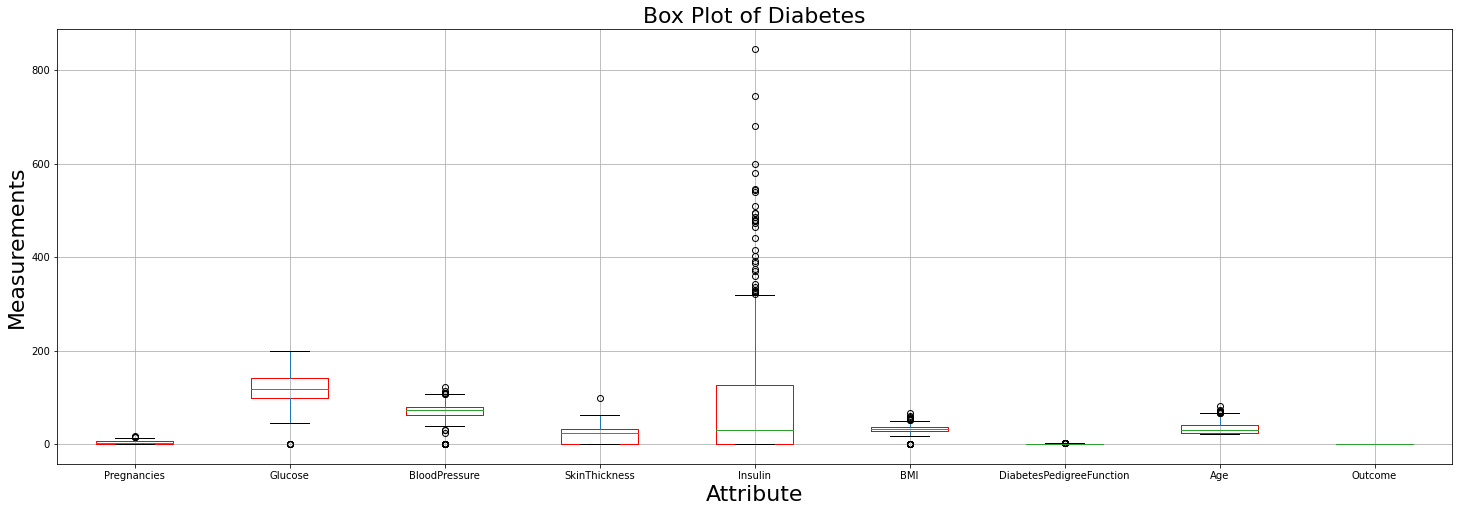

In [225]:
import matplotlib.pyplot as plt
diabetes_df.boxplot(rot = 0, boxprops = dict(color = 'red'), return_type = 'axes', figsize = (25, 8))
plt.title('Box Plot of Diabetes', fontsize = 22)
plt.xlabel('Attribute', fontsize = 22)
plt.ylabel('Measurements', fontsize = 22)
plt.show()

Pair plot or Scatter plot matrix is used to identify and remove attributes with weak class-attribute relationship.

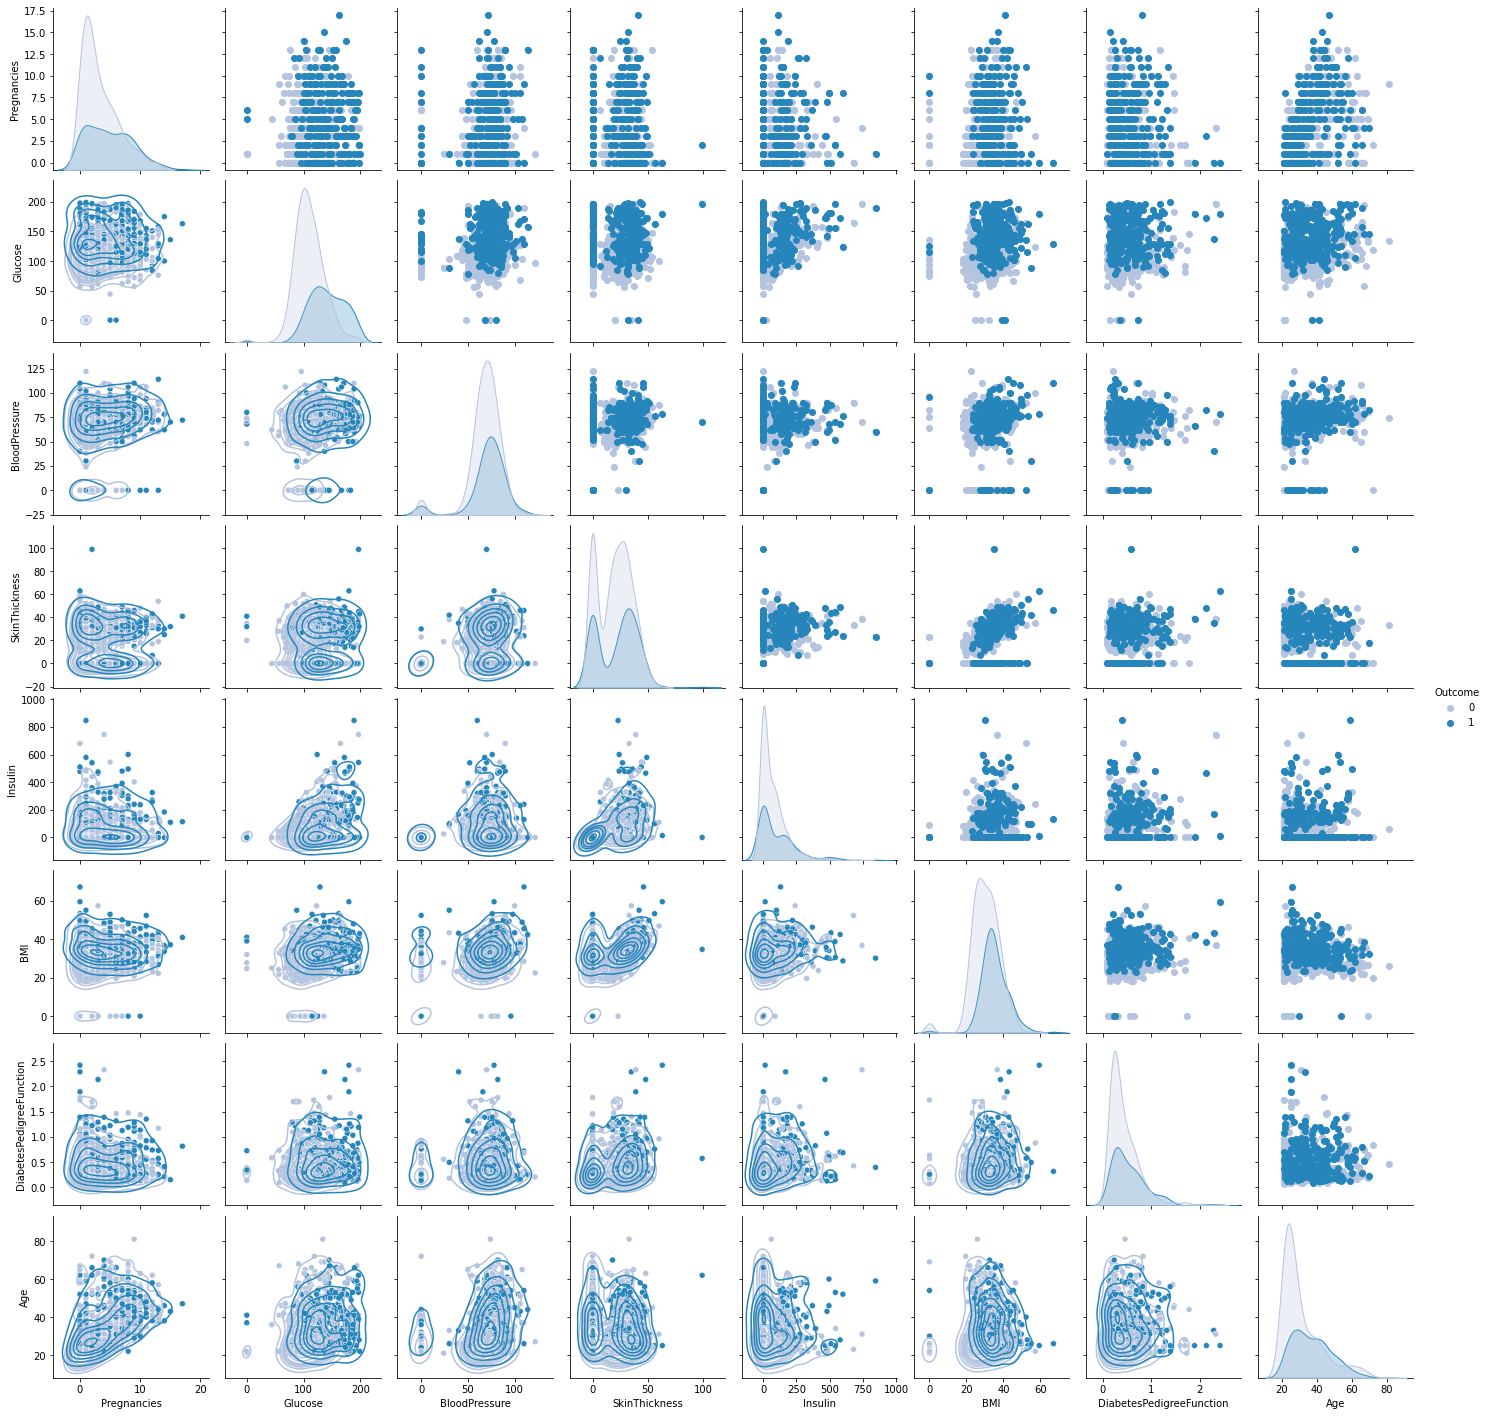

In [226]:
import seaborn as sns
sns.pairplot(diabetes_df, hue = 'Outcome', palette = 'PuBu').map_upper(plt.scatter).map_lower(sns.kdeplot)

In [228]:
print('Age   No.')
diabetes_df['Age'].value_counts()

Age   No.


22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64

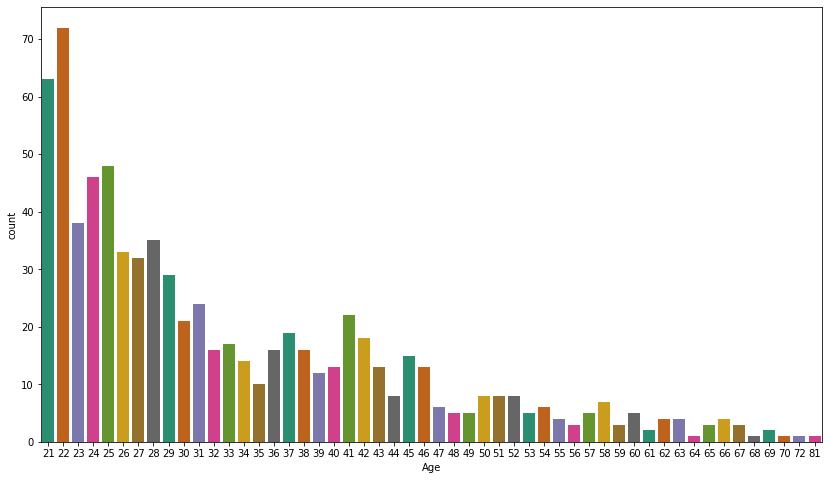

In [229]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 8
sns.countplot(x = 'Age', data = diabetes_df, palette = 'Dark2');

# **Data Preprocessing**

Data preprocessing is a data mining technique that transforms raw data into an understandable format. This process has four main stages – data cleaning, data integration, data transformation, and data reduction.

Data cleaning will filter, detect, and handle dirty data to ensure quality data and quality analysis results. In this case, there may be noises of impossible and extreme values and outliers, and missing values. The errors may include inconsistent data and redundant attributes and data.

In [227]:
diabetes_df['Outcome'].value_counts(ascending = True)

1    268
0    500
Name: Outcome, dtype: int64

In [230]:
diabetes_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [231]:
bmi_median = diabetes_df['BMI'].median()
diabetes_df['BMI'].replace(0, bmi_median)

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

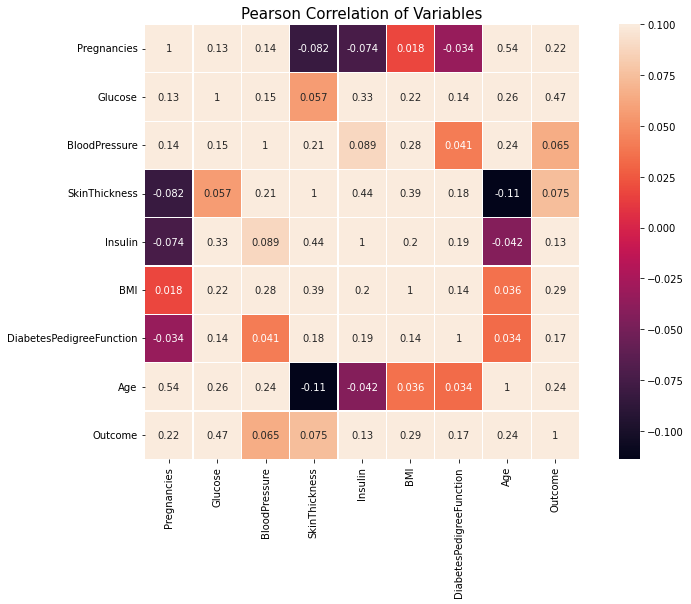

In [232]:
sns.heatmap(diabetes_df.corr(), linewidths = 0.1, vmax = 0.1, square = True, linecolor = 'white', annot = True)
plt.title('Pearson Correlation of Variables', size = 15);

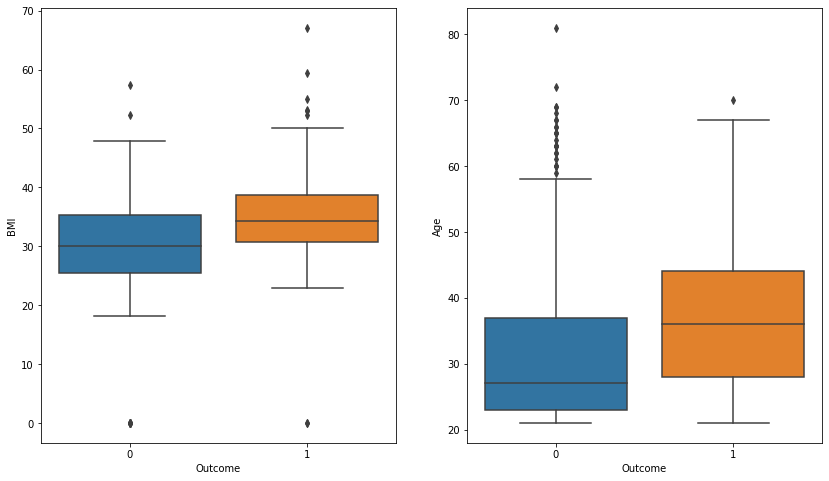

In [233]:
f, axes = plt.subplots(1, 2)
sns.boxplot(x = diabetes_df.Outcome, y = diabetes_df.BMI, ax = axes[0]);
sns.boxplot(x = diabetes_df.Outcome, y = diabetes_df.Age, ax = axes[1]);

In [234]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [235]:
diabetes_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# **Data Modeling**

The dataset is split into two separate sets - the training set and test set. They both cosnist of the same attributes, but not the same attribute values. The training set is used to train and construct the classification models. The test set is used to predict the classifications of the new unbiased data that were not used to train the model, before evaluating the model performance based on the performance metrics of accuracy, precision, recall and f1-score of those classifications.

In [236]:
from sklearn.model_selection import train_test_split
X = diabetes_df.drop('Outcome', axis = 1) #Predictors
y = diabetes_df['Outcome'] #labels

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Feature Scaling**

It is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

In [238]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean = False)

In [239]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# **SVM**

In [240]:
from sklearn.svm import SVC
svc_model = SVC(kernel = 'rbf', random_state = 0)
svc_model.fit(X_train, y_train)

SVC(random_state=0)

In [241]:
y_pred = svc_model.predict(X_test)

In [242]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[96 11]
 [20 27]]


The F-score, also called as F1-score is a measure of a model's accuracy on a dataset.
f1 = 2 * (Precision * Recall)/(Precision + Recall)

Precision is the fraction of true positive examples among the examples that the model classified as positive. In other words, the number of true positives divided by the number of false positives plus true positives.

Recall, also known as sensitivity, is the fraction of examples classified as positive, among the total number of positive examples. In other words, the number of true positives divided by the number of true positives plus false negatives.

In [243]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       107
           1       0.71      0.57      0.64        47

    accuracy                           0.80       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.79      0.80      0.79       154



In general, an AUC of 0.5 suggests no discrimination (i.e., ability to diagnose patients with and without the disease or condition based on the test), 0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is considered excellent, and more than 0.9 is considered outstanding.

In [244]:
from sklearn.metrics import roc_auc_score, roc_curve
auc = roc_auc_score(y_test, y_pred)
print('AUC', auc)

AUC 0.7358321733943131


In [245]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print('FPR', fpr)
print('TPR', tpr)
print('Thresholds', thresholds)

FPR [0.         0.10280374 1.        ]
TPR [0.         0.57446809 1.        ]
Thresholds [2 1 0]



Sensitivity, specificity, predictive values and likelihood ratios (LRs) are all different ways of expressing test performance.

High sensitivity corresponds to high negative predictive value and is the ideal property of a “rule-out” test.

High specificity corresponds to high positive predictive value and is the ideal property of a “rule-in” test.

Receiver operating characteristic (ROC) curves compare sensitivity versus specificity across a range of values for the ability to predict a dichotomous outcome. Area under the ROC curve is another measure of test performance.


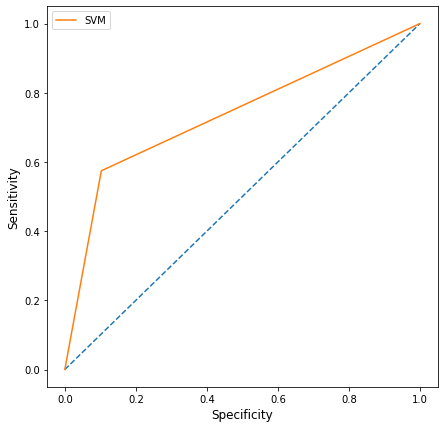

In [246]:
plt.figure(figsize = (7, 7))
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, label = 'SVM')
plt.xlabel('Specificity', fontsize = 12)
plt.ylabel('Sensitivity', fontsize = 12)
plt.legend(loc = 'best')
plt.show()

# **Model Cross-Validation using GridSearch CV**

In [247]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma':[1, 0.1, 0.01, 0.001]}
grid = GridSearchCV(SVC(), param_grid, verbose = 2)

In [248]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [249]:
grid_prediction = grid.predict(X_test)
print(confusion_matrix(y_test, grid_prediction))

[[99  8]
 [20 27]]


In [250]:
print(classification_report(y_test, grid_prediction))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       107
           1       0.77      0.57      0.66        47

    accuracy                           0.82       154
   macro avg       0.80      0.75      0.77       154
weighted avg       0.81      0.82      0.81       154



In [251]:
auc_grid = roc_auc_score(y_test, grid_prediction)
print('AUC', auc_grid)

AUC 0.749850864983098


In [252]:
fpr, tpr, thresholds = roc_curve(y_test, grid_prediction)
print('FPR', fpr)
print('TPR', tpr)
print('Thresholds', thresholds)

FPR [0.         0.07476636 1.        ]
TPR [0.         0.57446809 1.        ]
Thresholds [2 1 0]


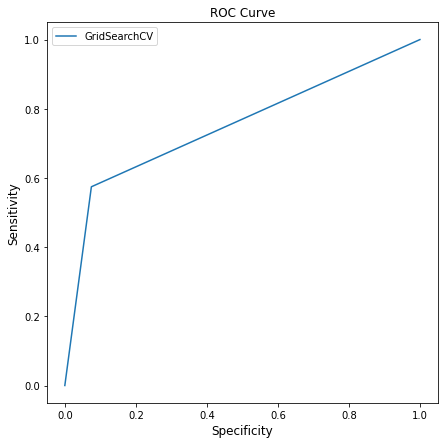

In [253]:
plt.figure(figsize = (7, 7))
plt.title('ROC Curve')
plt.plot(fpr, tpr, label = 'GridSearchCV')
plt.xlabel('Specificity', fontsize = 12)
plt.ylabel('Sensitivity', fontsize = 12)
plt.legend(loc = 'best')
plt.show()

# **Decision Tree**

**Choosing appropriate range of training set proportions**

In [254]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

**Plot decision tree based on information gain**

In [255]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(splitter = 'best', criterion = 'entropy', min_samples_leaf = 2)

In [256]:
DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2)

In [257]:
DT.feature_importances_

array([0.0652579 , 0.28956582, 0.08503571, 0.00483776, 0.0682641 ,
       0.2030366 , 0.1473066 , 0.13669551])

In [258]:
y_pred_DT = DT.predict(X_test)

In [259]:
print(confusion_matrix(y_test, y_pred_DT))

[[76 31]
 [23 24]]


In [260]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       107
           1       0.44      0.51      0.47        47

    accuracy                           0.65       154
   macro avg       0.60      0.61      0.60       154
weighted avg       0.67      0.65      0.66       154



In [261]:
from sklearn.metrics import accuracy_score
print('Train Accuracy:', accuracy_score(y_train, DT.predict(X_train)))
print('Test Accuracy:', accuracy_score(y_test, y_pred_DT))

Train Accuracy: 0.9609120521172638
Test Accuracy: 0.6493506493506493


# **K-nearest neighbour**

In [262]:
import math
from sklearn.neighbors import KNeighborsClassifier

In [263]:
len(X_train), len(X_test)

(614, 154)

**The training subset takes up 614 instances, whereas the test subset takse up the remaining 154 instances.**

In [264]:
KNN = KNeighborsClassifier(n_neighbors = math.ceil(math.sqrt(768)))

**Finding optimal 'k' number of clusters**

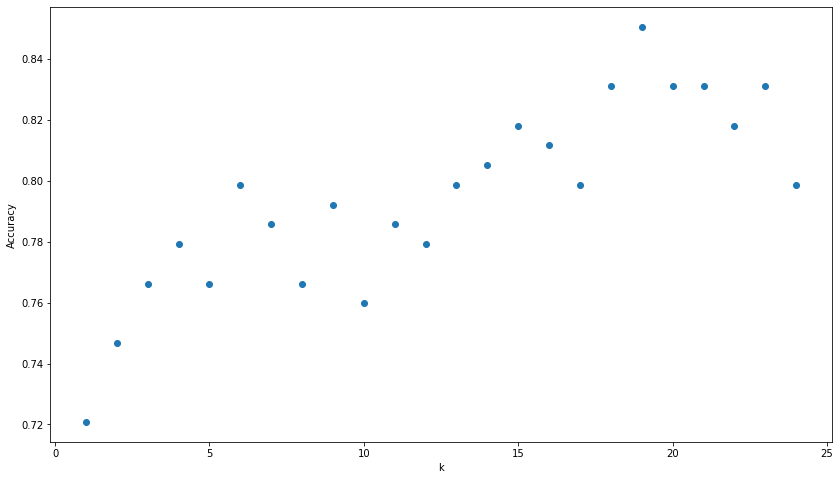

In [265]:
k_range = range(1, 25)
scores = []
for k in k_range:
  KNN = KNeighborsClassifier(n_neighbors = k)
  KNN.fit(X_train, y_train)
  scores.append(KNN.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.scatter(k_range, scores)
plt.xticks([0, 5, 10, 15, 20, 25]);

In [266]:
KNN = KNeighborsClassifier(n_neighbors = 19)

In [267]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=19)

In [268]:
KNN.effective_metric_

'euclidean'

In [269]:
y_pred_KNN = KNN.predict(X_test)

In [270]:
print(confusion_matrix(y_test, y_pred_KNN))

[[101   6]
 [ 17  30]]


In [271]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       107
           1       0.83      0.64      0.72        47

    accuracy                           0.85       154
   macro avg       0.84      0.79      0.81       154
weighted avg       0.85      0.85      0.84       154



In [272]:
print('Train Accuracy: ', accuracy_score(y_train, KNN.predict(X_train)))
print('Test Accuracy: ', accuracy_score(y_test, y_pred_KNN))

Train Accuracy:  0.7801302931596091
Test Accuracy:  0.8506493506493507


# **Naive Bayes**

Gaussian Naive Bayes is suitable for continuous data types, and the prior probabilities and likelihoods are computed in order to predict the posterior probability of a data point belonging to each of the three classes.

In [273]:
from sklearn.naive_bayes import GaussianNB

In [274]:
NB = GaussianNB()

In [275]:
NB.fit(X_train, y_train)

GaussianNB()

In [276]:
NB.class_prior_

array([0.64006515, 0.35993485])

The class prior indicates the probability of a observation belonging to a specific class if no information was given. The probability of prediction is 64% as 0 and only 35.9% as 1.

In [277]:
y_pred_NB = NB.predict(X_test)

In [278]:
print(confusion_matrix(y_test, y_pred_NB))

[[86 21]
 [15 32]]


In [279]:
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83       107
           1       0.60      0.68      0.64        47

    accuracy                           0.77       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.78      0.77      0.77       154



In [280]:
print("Train Accuracy: ", accuracy_score(y_train, NB.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred_NB))

Train Accuracy:  0.757328990228013
Test Accuracy:  0.7662337662337663


# **Model Interpretation**

In [281]:
new_data = [[1, 50, 80, 33, 70, 30, 0.55, 20]]

In [283]:
prob_KNN = KNN.predict_proba(new_data)

In [284]:
prob_KNN.round(4)

array([[0.3158, 0.6842]])

In [285]:
pred_KNN = KNN.predict(new_data)
pred_KNN

array([1])

In [286]:
prob_NB = NB.predict_proba(new_data)

In [287]:
prob_NB.round(4)

array([[0., 1.]])

In [288]:
pred_NB = NB.predict(new_data)
pred_NB

array([1])